 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [64]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [65]:
# Reading whale returns
whale_returns = 'whale_returns.csv'
whale_returns_df = pd.read_csv(whale_returns)

whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [66]:
# Count nulls
null_count = whale_returns_df.isnull().sum()

In [67]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [68]:
# Reading algorithmic returns
algo_returns = '../Instructions/Resources/algo_returns.csv'
algo_returns_df = pd.read_csv(algo_returns)

algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [69]:
# Count nulls
null_count = algo_returns_df.isnull().sum()

In [70]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [71]:
# Reading S&P 500 Closing Prices
sp500_history = '../Instructions/Resources/sp500_history.csv'
sp500_history_df = pd.read_csv(sp500_history)

sp500_history_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [72]:
# Check Data Types
print(sp500_history_df.dtypes)

Date     object
Close    object
dtype: object


In [73]:
# Fix Data Types
sp500_history_df['Close'] = pd.to_numeric(sp500_history_df['Close'], errors='coerce')
print(sp500_history_df.dtypes)

Date      object
Close    float64
dtype: object


In [74]:
# Calculate Daily Returns
sp500_history_df['Daily Returns'] = sp500_history_df['Close'].pct_change()

In [75]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [76]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns={'Close': 'S&P 500 Close'}, inplace=True)

sp500_history_df.head()

,Date,S&P 500 Close,Daily Returns


## Combine Whale, Algorithmic, and S&P 500 Returns

In [77]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis=1, join="inner")

# Sort Combined Index
combined_returns_df.sort_index(inplace= True)

# Display new Index
combined_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,S&P 500 Close,Daily Returns


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: >

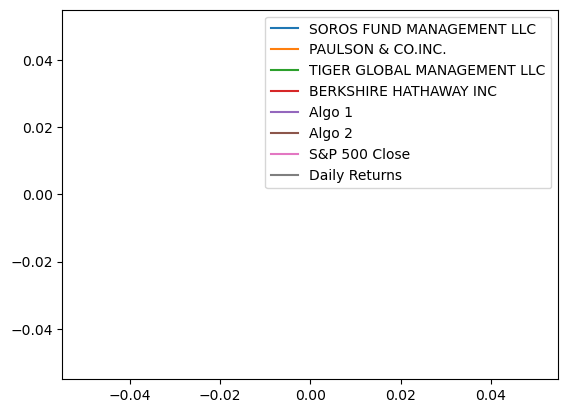

In [78]:
# Plot daily returns of all portfolios
combined_returns_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: >

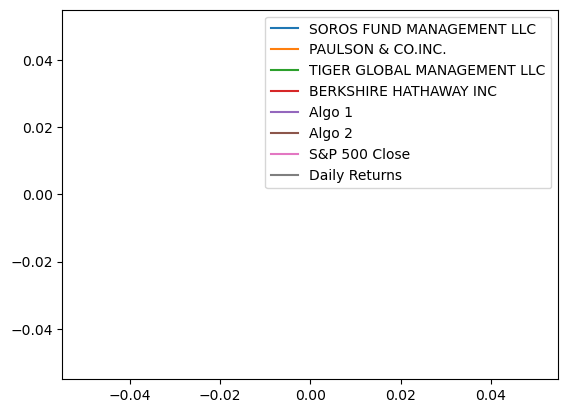

In [79]:
# Calculate daily returns
daily_returns = combined_returns_df.pct_change()
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1


# Plot cumulative returns
title = 'Cumulative Returns of Portfolios'
cumulative_returns.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


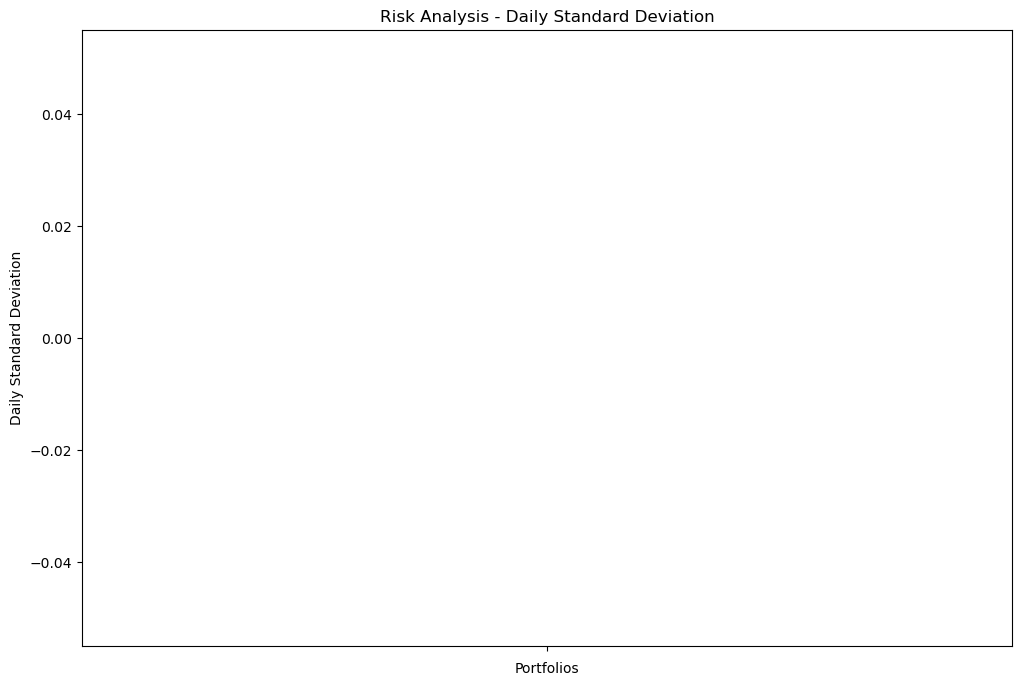

In [80]:
# Box plot to visually show risk
import statistics

title = 'Risk Analysis - Daily Standard Deviation'
daily_std = daily_std.plot(kind='box', figsize=(12,8), title=title)
plt.xlabel('Portfolios')
plt.ylabel('Daily Standard Deviation')
plt.show()

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.drop('Daily Returns', axis=1).std()

### Determine which portfolios are riskier than the S&P 500

In [82]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = daily_returns['Daily Returns'].std()

# Determine which portfolios are riskier than the S&P 500
risk_portfolios = daily_std[daily_std > sp500_daily_std]

### Calculate the Annualized Standard Deviation

In [83]:
# Calculate the annualized standard deviation (252 trading days)
sp500_daily_std = combined_returns_df['Daily Returns'].std()

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 



### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: >

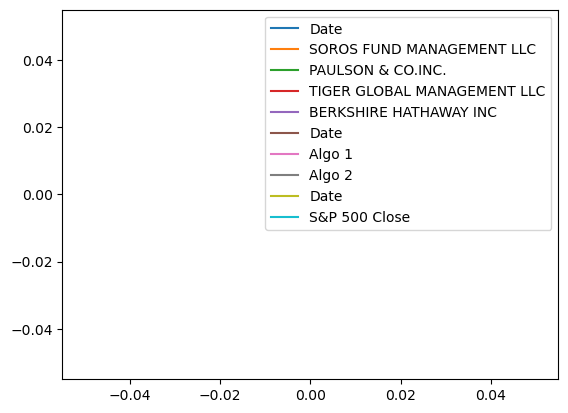

In [84]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = daily_returns.drop('Daily Returns', axis=1).rolling(window=21).std()

# Plot the rolling standard deviation
title = 'Rolling 21-Day Standard Deviation for Portfolios'
rolling_std.plot.line()
    

### Calculate and plot the correlation

In [85]:
# Calculate the correlation
correlation_matrix = combined_returns_df.drop('Date', axis=1).corr()
# Display de correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                          NaN                 NaN   
PAULSON & CO.INC.                                  NaN                 NaN   
TIGER GLOBAL MANAGEMENT LLC                        NaN                 NaN   
BERKSHIRE HATHAWAY INC                             NaN                 NaN   
Algo 1                                             NaN                 NaN   
Algo 2                                             NaN                 NaN   
S&P 500 Close                                      NaN                 NaN   
Daily Returns                                      NaN                 NaN   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                            NaN   
PAULSON & CO.INC.                                    NaN   
TIGER GLOBAL MANAGEMENT LLC                          NaN   
BERKSHIRE HATHAWAY INC               

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [86]:
# Calculate covariance of a single portfolio
single_portfolio = 'SOROS FUND MANAGEMENT LLC'
# Calculate variance of S&P 500
covariance = combined_returns_df[single_portfolio].cov(combined_returns_df['S&P 500 Close'])
# Computing beta
sp500_variance = combined_returns_df['S&P 500 Close'].var()
beta = covariance / sp500_variance

# Plot beta trend
